In [2]:
import pickle
from copy import deepcopy
from pathlib import Path
from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn_evaluation import plot

from drowsiness_detection import config
from drowsiness_detection.visualize import plot_search_results

### Loading GridSearch Result Objecst:

In [3]:
def load_pickle_object(filepath: Path):
    with open(filepath, "rb") as fp:
        return pickle.load(fp)


results_path = config.SOURCES_ROOT_PATH.parent.joinpath("data/grid_search_results")
log_reg_res_path = results_path.joinpath("log_reg_result.pkl")
rf_res_path = results_path.joinpath("rf_result.pkl")

regression_result = load_pickle_object(log_reg_res_path)
forest_result = load_pickle_object(rf_res_path)

/home/tim/IM/venv/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/tim/IM/venv/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Plot performance/impact of the choice of each parameter

1. We plot the score (y-axis) of each possible value for a parameter (x-axis). Except the parameter which is changed, the set of parameters is fixed with the best values for each plot.

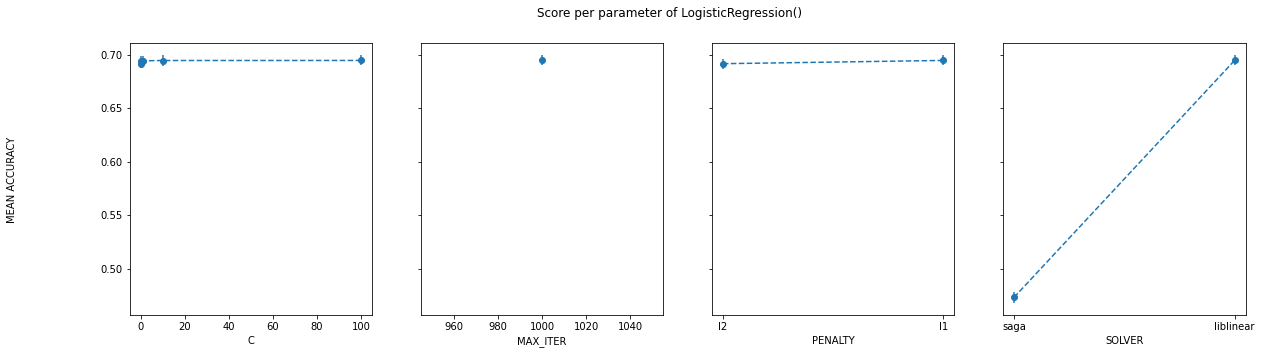

In [4]:
plot_search_results(regression_result)

2. Next we plot the values of each parameters in their own subplot against the score resulting using all other parameter configurations (colors of lines/bars).
As already seen in the first plots, the only parameter really improving the score is the choice of the solver.

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'max_iter': [1000],
                         'penalty': ['l2', 'l1'],
                         'solver': ['saga', 'liblinear']},
             scoring='accuracy')
("Best parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': "
 "'liblinear'}")


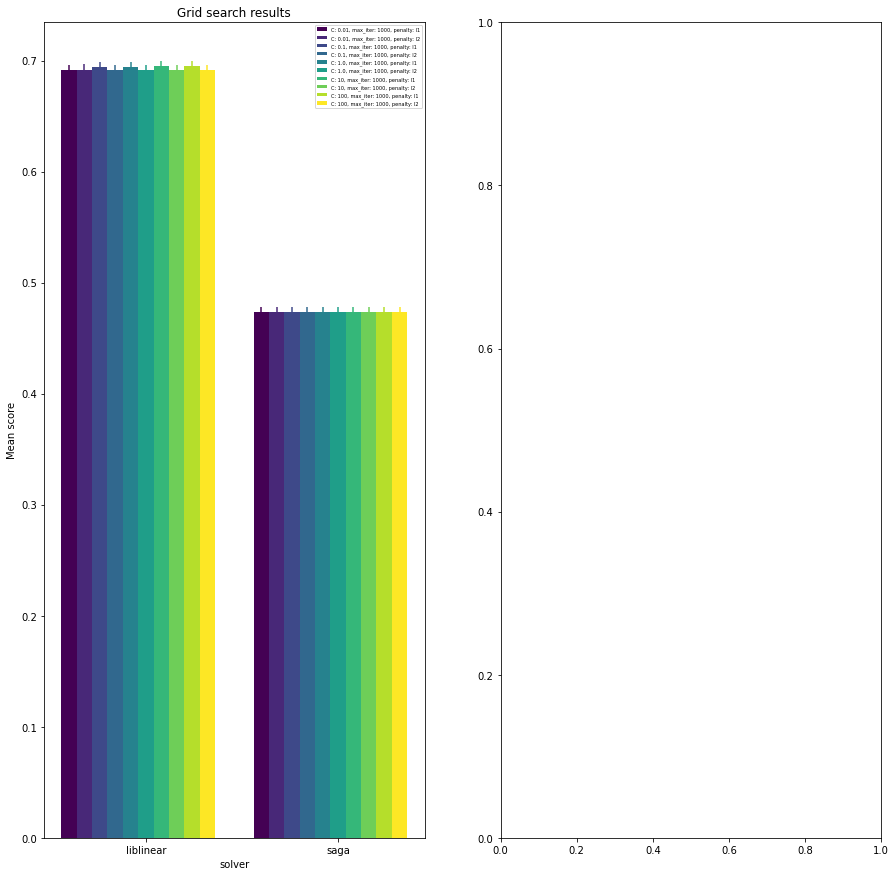

In [10]:
# bar plot is better if the values for the x-axis are not distributed evenly, because the scale is then uniform
rcParams["figure.figsize"] = 15, 15
feat_subset = {
    # 'C': [100, 10, 1.0, 0.1, 0.01],
    #            'max_iter': [1000],
    #            'penalty': ['l2', 'l1'],
               'solver': ['saga', 'liblinear']}
pprint(regression_result)
pprint("Best parameters: "+ str(regression_result.best_params_))
n_rows = int(len(feat_subset) / 2 + .5)
fig, axs = plt.subplots(n_rows, 2)
for ax, param in zip(axs.flatten(), feat_subset.keys()):
    _ = plot.grid_search(regression_result.cv_results_, change=str(param), kind="bar",
                         subset=feat_subset, ax=ax)
    ax.legend(fontsize=5)

#### Fix Solver to "liblinear" and inspect other parameter choices.

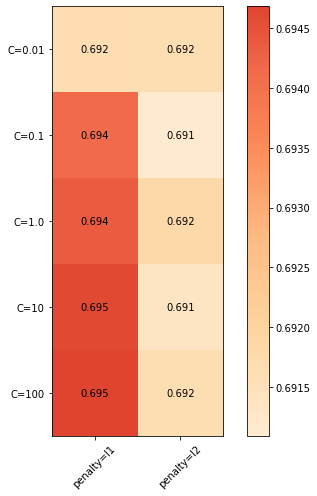

In [111]:
rcParams["figure.figsize"] = 7,7

_ = plot.grid_search(regression_result.cv_results_, change=("C","penalty"),
                         subset={"max_iter": 1000, "solver": "liblinear"})

### Let's do the same for the _Random Forest Classifier_.

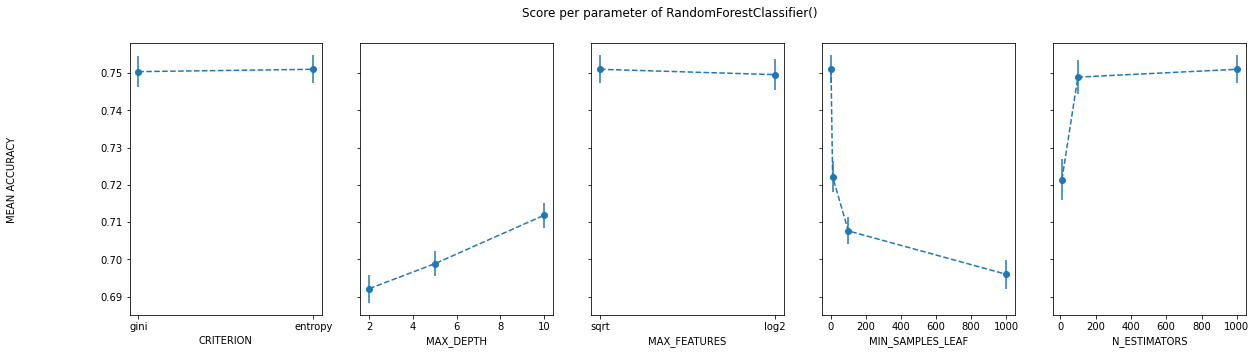

In [107]:
forest_result_no_none = deepcopy(forest_result)
forest_result_no_none.param_grid["max_depth"][-1] = float(
    "inf")  # None not possible as x-axis, inf will be skipped though
plot_search_results(forest_result_no_none)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 10, 100, 1000],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy', verbose=5)
{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 1000}


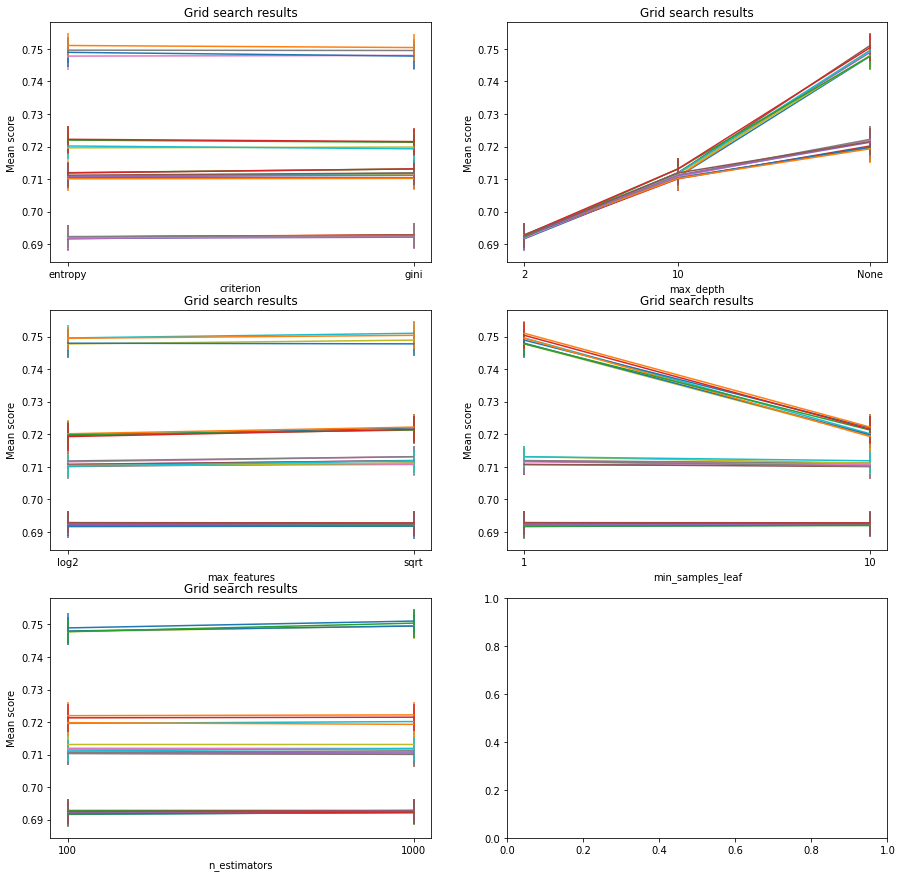

In [103]:
rcParams["figure.figsize"] = 15, 15
forest_result_no_deep_none = deepcopy(forest_result)

pprint(forest_result_no_deep_none)
pprint("Best Parameters:\n", forest_result_no_deep_none.best_params_)

feat_subset = {'criterion': ['gini', 'entropy'],
               'max_depth': [2, 10, 20],
               'max_features': ['sqrt', "log2"],
               'min_samples_leaf': [1, 10, ],
               'n_estimators': [100, 1000]}
for param_dict in forest_result_no_deep_none.cv_results_["params"]:
    param_dict["max_depth"] = 20 if param_dict["max_depth"] is None else param_dict["max_depth"]

n_rows = int(len(feat_subset) / 2 + .5)
fig, axs = plt.subplots(n_rows, 2)
for ax, param in zip(axs.flatten(), feat_subset.keys()):
    _ = plot.grid_search(forest_result_no_deep_none.cv_results_, change=str(param),
                         subset=feat_subset, ax=ax)

    ax.legend(fontsize=5)
    ax.legend().set_visible(False)

ax = axs.flatten()[1]
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[-1] = 'None'
_ = ax.set_xticklabels(labels)


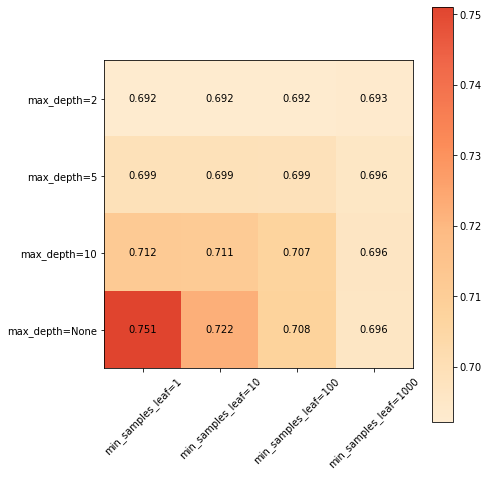

In [14]:
_ = plot.grid_search(forest_result.cv_results_, change=("max_depth", "min_samples_leaf"), subset={"criterion": "entropy", "n_estimators": 1000, "max_features":"sqrt"})